In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ty = pd.read_csv('toyota.csv')

In [2]:
ty.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


**Check for any null values or missing values**

In [3]:
ty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [4]:
ty.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [5]:
ty.shape

(6738, 9)

This data contains 6738 rows, 9 columns and no null values

**Check for duplicates**

In [6]:
ty.duplicated()

# No duplicates found

0       False
1       False
2       False
3       False
4       False
        ...  
6733    False
6734    False
6735    False
6736    False
6737    False
Length: 6738, dtype: bool

After data validation, the dataset contains 6738 rows and 9 columns without missing values and the data needed no cleaning.

In [7]:
#create a index column for easier count of sales

ty['index'] = ty.index
print(ty)

               model  year  price transmission  mileage fuelType  tax   mpg  \
0               GT86  2016  16000       Manual    24089   Petrol  265  36.2   
1               GT86  2017  15995       Manual    18615   Petrol  145  36.2   
2               GT86  2015  13998       Manual    27469   Petrol  265  36.2   
3               GT86  2017  18998       Manual    14736   Petrol  150  36.2   
4               GT86  2017  17498       Manual    36284   Petrol  145  36.2   
...              ...   ...    ...          ...      ...      ...  ...   ...   
6733              IQ  2011   5500    Automatic    30000   Petrol   20  58.9   
6734   Urban Cruiser  2011   4985       Manual    36154   Petrol  125  50.4   
6735   Urban Cruiser  2012   4995       Manual    46000   Diesel  125  57.6   
6736   Urban Cruiser  2011   3995       Manual    60700   Petrol  125  50.4   
6737   Urban Cruiser  2011   4495       Manual    45128   Petrol  125  50.4   

      engineSize  index  
0            2.0      0  

**How the sales differ between hybrid and other types**

According to an email sent by the marketing team, the team wants to know how sales differ between hybrids and other fuel types.  The chart below, based on data from the last six months, shows a 31% difference in sales between petrol and hybrid car models, implying that the number of petrol-fueled cars sold is twice that of hybrid cars.

In [8]:
ty_count_of_sales = ty.groupby(['fuelType'])['index'].agg('count').reset_index()
ty_count_of_sales = ty_count_of_sales.sort_values('index', ascending=False)
ty_count_of_sales.head()

,fuelType,index
3,Petrol,4087
1,Hybrid,2043
0,Diesel,503
2,Other,105


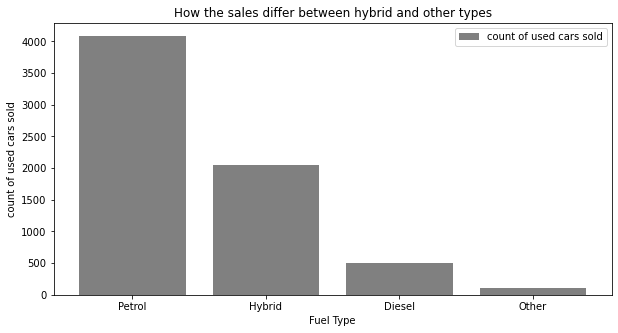

In [9]:
#visualization of how sales differ

plt.figure(figsize=(10,5))

plt.bar(x=ty_count_of_sales['fuelType'],
       height = ty_count_of_sales['index'],
       label = "count of used cars sold",
       color = "grey")
plt.plot()

plt.xlabel("Fuel Type")
plt.ylabel("count of used cars sold")
plt.title("How the sales differ between hybrid and other types")

plt.legend()
plt.show()

**How sales differ among hybrid cars**

Our primary goal is to find ways to make hybrid cars more appealing. This diagram shows that the Yaris, Auris, and C-HR are the top three hybrid cars sold, implying that these three car models can be used for major hybrid car campaigns.

In [10]:
ty_sales = ty[ty['fuelType'] == 'Hybrid'].groupby(['model'])['index'].agg('count').reset_index()
ty_sales = ty_sales.sort_values('index', ascending=False)
ty_sales.head()

,model,index
6,Yaris,557
0,Auris,498
1,C-HR,352
5,RAV4,230
4,Prius,214


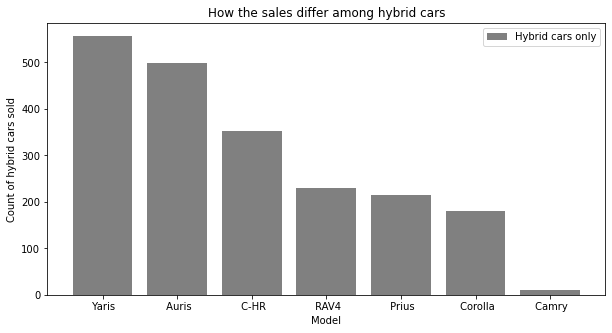

In [22]:
plt.figure(figsize=(10, 5))

plt.bar(x=ty_sales['model'],
        height=ty_sales['index'],
        label="Hybrid cars only",
        color="grey")
plt.plot()

plt.xlabel("Model")
plt.ylabel("Count of hybrid cars sold")
plt.title("How the sales differ among hybrid cars")

plt.legend()
plt.show()

**Price ranges of different hybrid cars models**

Some Yaris and Auris car models are sold for less than 10,000 GBP, which is nearly the same price as some petrol-type car models and can compete in the market. These car models should be considered for the hybrid car marketing campaign for people who are concerned about how expensive hybrid cars are. These vehicles can be used to encourage people to try hybrid cars.

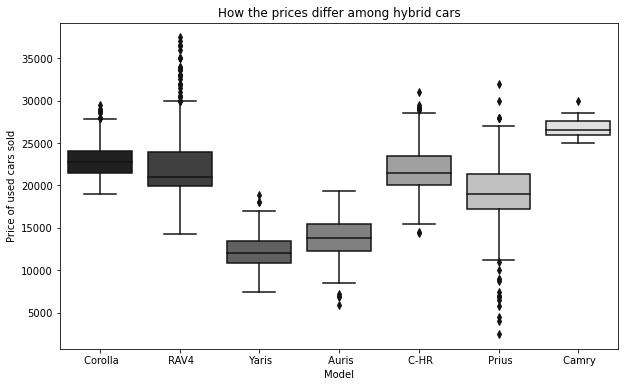

In [20]:
import seaborn as sns

# Create a new figure with a larger size
plt.figure(figsize=(10, 6))

# Create the box plot using sns.boxplot()
sns.boxplot(x='model', y='price', data=ty[ty['fuelType'] == 'Hybrid'], palette='gray')

plt.xlabel("Model")
plt.ylabel("Price of used cars sold")
plt.title("How the prices differ among hybrid cars")

plt.show()

**How much different fuel types pay in road tax**

The tax is another piece of information that draws attention to me. Petrol cars pay more tax than hybrid cars; most hybrid cars pay as little as 0 GBP to less than 200 GBP, whereas petrol cars pay as much as 300 GBP. The marketing team can use this as a promotion to persuade customers to purchase hybrid cars. 

In [15]:
ty_by_fuel_tax = ty.groupby(['fuelType', 'tax']).agg({'index': 'count'}).reset_index()
ty_by_fuel_tax.columns = ['fuelType', 'tax', 'count']

print(ty_by_fuel_tax.head())

  fuelType  tax  count
0   Diesel    0     27
1   Diesel   20     57
2   Diesel   30     42
3   Diesel  125     88
4   Diesel  140      1


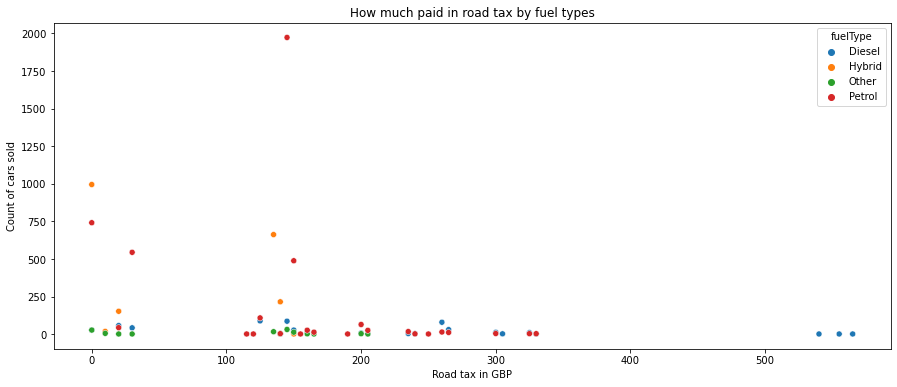

In [18]:
plt.figure(figsize=(15, 6))

sns.scatterplot(x='tax', y='count', data=ty_by_fuel_tax, hue='fuelType')

plt.xlabel("Road tax in GBP")
plt.ylabel("Count of cars sold")
plt.title("How much paid in road tax by fuel types")

plt.show()